In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient

client = MongoClient()
collection = client['video']['douban']
data = list(collection.find())
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 11 columns):
_id          1109 non-null object
casts        1109 non-null object
contents     1109 non-null object
country      1109 non-null object
date         1109 non-null object
directors    1109 non-null object
id           1109 non-null object
rate         1109 non-null object
runtime      1109 non-null object
title        1109 non-null object
type         1109 non-null object
dtypes: object(11)
memory usage: 95.4+ KB


In [24]:
df.head()

,_id,casts,contents,country,date,directors,id,rate,runtime,title,type
0,5cd3f1649f60af1e9842973b,"[克里斯·帕拉特, 佐伊·索尔达娜, 戴夫·巴蒂斯塔, 范·迪塞尔, 布莱德利·库珀]",333292,[美国],"[2017-05-05(中国大陆/美国), 2017-04-19(洛杉矶首映)]",[詹姆斯·古恩],25937854,8.0,136,银河护卫队2,"[动作, 科幻, 冒险]"
1,5cd3f1689f60af1e9842973c,"[古天乐, 郑嘉颖, 林峯, 林家栋, 周秀娜]",50064,[香港 / 中国大陆],[2019-04-04(中国大陆)],[林德禄 ],27202819,6.3,100,反贪风暴4,"[动作, 犯罪]"
2,5cd3f16b9f60af1e9842973d,"[沈腾, 黄景瑜, 尹正, 张本煜, 尹昉]",542243,[中国大陆],[2019-02-05(中国大陆)],[韩寒],30163509,6.9,98,飞驰人生,[喜剧]
3,5cd3f16f9f60af1e9842973e,"[克里斯·埃文斯, 小罗伯特·唐尼, 斯嘉丽·约翰逊, 塞巴斯蒂安·斯坦, 安东尼·麦凯]",341829,[美国],"[2016-05-06(中国大陆/美国), 2016-04-12(加州首映)]","[安东尼·罗素, 乔·罗素]",25820460,7.8,148,美国队长3,"[动作, 科幻, 冒险]"
4,5cd3f1739f60af1e9842973f,"[小罗伯特·唐尼, 泰伦斯·霍华德, 格温妮斯·帕特洛, 杰夫·布里吉斯, 莱丝莉·比伯]",374618,[美国],"[2008-04-30(中国大陆), 2008-04-14(悉尼首映), 2008-05-0...",[乔恩·费儒],1432146,8.2,126,钢铁侠,"[动作, 科幻, 惊悚, 冒险]"


## 获取导演

In [25]:
dir_list = list(df['directors'])
dir_list = [i for j in dir_list for i in j]
print(len(dir_list))

1254


In [26]:
#去重后
print(len(set(dir_list)))

683


In [27]:
#统计每个导演出现的次数
dic = {}
for i in set(dir_list):
    dic[i] = dir_list.count(i)
# 按照值大小排序
new_lst = sorted(dic.items(),key=lambda x:x[1],reverse=True)

### 高产导演Top20

In [28]:
new_lst[:20]

[('王晶', 18),
 ('冯小刚', 12),
 ('张艺谋', 12),
 ('史蒂文·斯皮尔伯格', 10),
 ('宫崎骏', 10),
 ('周星驰', 10),
 ('徐克', 10),
 ('杜琪峰', 9),
 ('克里斯托弗·诺兰', 8),
 ('刘镇伟', 8),
 ('王家卫', 8),
 ('雷德利·斯科特', 8),
 ('麦兆辉', 8),
 ('李安', 8),
 ('迈克尔·贝', 8),
 ('彼得·杰克逊', 7),
 ('吴宇森', 7),
 ('蒂姆·波顿', 7),
 ('昆汀·塔伦蒂诺', 7),
 ('布莱恩·辛格', 7)]

In [29]:
name_list = []
num_list = []
for i in new_lst[:20]:
    name_list.append(i[0])
    num_list.append(i[1])
print(name_list)
print(num_list)

['王晶', '冯小刚', '张艺谋', '史蒂文·斯皮尔伯格', '宫崎骏', '周星驰', '徐克', '杜琪峰', '克里斯托弗·诺兰', '刘镇伟', '王家卫', '雷德利·斯科特', '麦兆辉', '李安', '迈克尔·贝', '彼得·杰克逊', '吴宇森', '蒂姆·波顿', '昆汀·塔伦蒂诺', '布莱恩·辛格']
[18, 12, 12, 10, 10, 10, 10, 9, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7]


#### 绘图

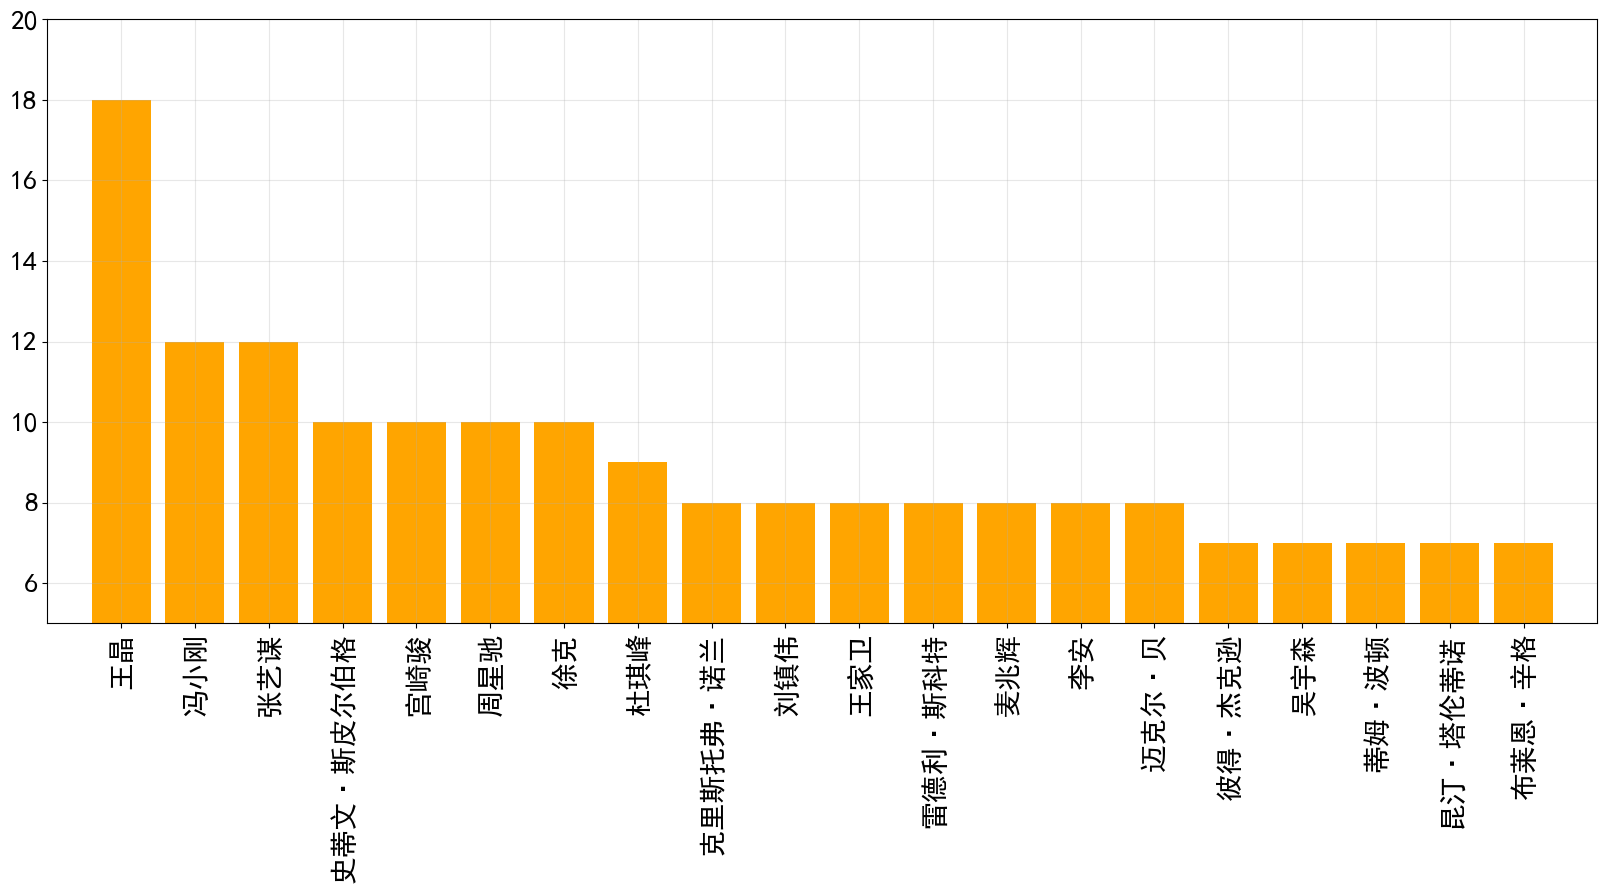

In [30]:
from matplotlib import pyplot as plt
import matplotlib
#设定中文字体
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size'] = 20
#设定图形大小
plt.figure(figsize=(20,8),dpi=100)
#设定x,y轴的范围
plt.axis([0,len(name_list)+1,5,20])
#设定x轴刻度
_x = range(1,len(name_list)+1)
_y = num_list
plt.bar(_x,_y,color='orange')
plt.xticks(_x,name_list,rotation=90)
plt.grid(alpha=0.3)
plt.show()

### 看看这些高产导演质量怎么样

In [31]:
#将列表转化为str
def switch_str(x):
    res = ','.join(x)
    return res
str_directors = df['directors'].apply(switch_str)
str_directors

0                    詹姆斯·古恩
1                      林德禄 
2                        韩寒
3               安东尼·罗素,乔·罗素
4                     乔恩·费儒
5                     乔·庄斯顿
6               安东尼·罗素,乔·罗素
7                    瑞恩·库格勒
8                    沙恩·布莱克
9                   肯尼思·布拉纳
10                    佩顿·里德
11                 斯科特·德瑞克森
12                    阿兰·泰勒
13                 路易斯·莱特里尔
14              安东尼·罗素,乔·罗素
15                    乔斯·韦登
16                    乔斯·韦登
17                    乔恩·费儒
18                   娜丁·拉巴基
19              安东尼·罗素,乔·罗素
20                       郭帆
21                      饶晓志
22                   涅提·蒂瓦里
23                      温子仁
24      拜伦·霍华德,瑞奇·摩尔,杰拉德·布什
25                  詹姆斯·卡梅隆
26                  亚当·罗比特尔
27                  奥里奥尔·保罗
28                      文牧野
29                      宫崎骏
               ...         
1079                    翁子光
1080                索菲亚·科波拉
1081                    刘镇伟
1082                    武正晴
1083               理

In [32]:
#因为评分为字符串 所以需要将其转化为float
def sw_rate(x):
    x = float(x)
    return x
df['rate'] = df['rate'].apply(sw_rate)
df[str_directors.str.contains('蒂姆·波顿')]['rate'].mean()

7.857142857142857

In [33]:
#设计函数能求出这些导演的电影平均分

def average_rate(name):
    rate = df[str_directors.str.contains(name)]['rate'].mean()
    return rate
#average_rate(name)
#将Top20的导演电影平均分添加到列表    
rate_list = []
for name in name_list:
    rate = average_rate(name)
    rate_list.append(rate)

rate_list = [round(i,2) for i in rate_list]
rate_list

[7.03,
 7.17,
 7.28,
 8.57,
 8.75,
 7.47,
 7.12,
 7.59,
 8.81,
 7.5,
 8.3,
 8.15,
 7.41,
 8.39,
 7.25,
 8.54,
 7.7,
 7.86,
 8.4,
 7.89]

### 绘图

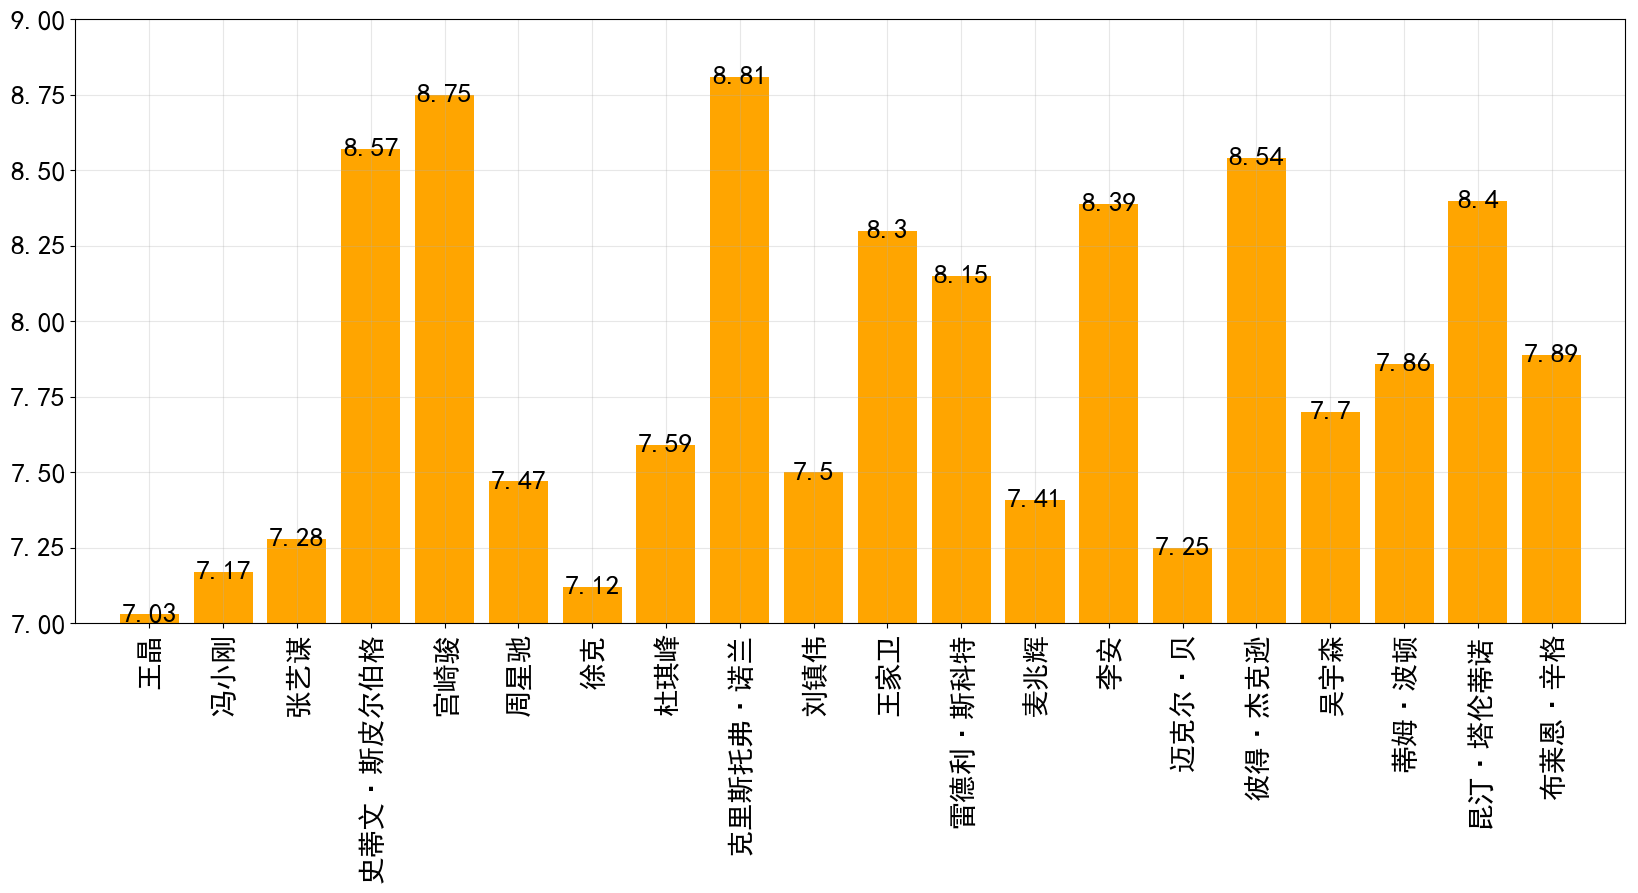

In [34]:
from matplotlib import pyplot as plt
import matplotlib
#设定中文字体
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size'] = 20
#设定图形大小
plt.figure(figsize=(20,8),dpi=100)
#设定x,y轴的范围
plt.axis([0,len(name_list)+1,7,9])
#设定x轴刻度
_x = range(1,len(name_list)+1)
_y = rate_list
plt.bar(_x,_y,color='orange')
plt.xticks(_x,name_list,rotation=90)
plt.grid(alpha=0.3)
for x,y in zip(_x,_y):
    #print(x,y)
    plt.text(x,y,rate_list[x-1],ha='center',va='center')
plt.show()

### 各国电影评分对比

In [35]:
def switch_country(x):
    x = x[0]
    x = x.split('/')[0]
    x = x.strip()
    return x
df['country'] = df['country'].apply(switch_country)
df['country']

0         美国
1         香港
2       中国大陆
3         美国
4         美国
5         美国
6         美国
7         美国
8         美国
9         美国
10        美国
11        美国
12        美国
13        美国
14        美国
15        美国
16        美国
17        美国
18       黎巴嫩
19        美国
20      中国大陆
21      中国大陆
22        印度
23        美国
24        美国
25        美国
26        美国
27       西班牙
28      中国大陆
29        日本
        ... 
1079      香港
1080      美国
1081    中国大陆
1082      日本
1083      美国
1084      韩国
1085      美国
1086      美国
1087      日本
1088      日本
1089    中国大陆
1090    中国大陆
1091      日本
1092    中国大陆
1093      美国
1094      日本
1095    中国大陆
1096      伊朗
1097      日本
1098    中国大陆
1099      美国
1100      美国
1101      韩国
1102      美国
1103      日本
1104      美国
1105      美国
1106    中国大陆
1107    中国大陆
1108    中国大陆
Name: country, Length: 1109, dtype: object

In [36]:
df.head()

,_id,casts,contents,country,date,directors,id,rate,runtime,title,type
0,5cd3f1649f60af1e9842973b,"[克里斯·帕拉特, 佐伊·索尔达娜, 戴夫·巴蒂斯塔, 范·迪塞尔, 布莱德利·库珀]",333292,美国,"[2017-05-05(中国大陆/美国), 2017-04-19(洛杉矶首映)]",[詹姆斯·古恩],25937854,8.0,136,银河护卫队2,"[动作, 科幻, 冒险]"
1,5cd3f1689f60af1e9842973c,"[古天乐, 郑嘉颖, 林峯, 林家栋, 周秀娜]",50064,香港,[2019-04-04(中国大陆)],[林德禄 ],27202819,6.3,100,反贪风暴4,"[动作, 犯罪]"
2,5cd3f16b9f60af1e9842973d,"[沈腾, 黄景瑜, 尹正, 张本煜, 尹昉]",542243,中国大陆,[2019-02-05(中国大陆)],[韩寒],30163509,6.9,98,飞驰人生,[喜剧]
3,5cd3f16f9f60af1e9842973e,"[克里斯·埃文斯, 小罗伯特·唐尼, 斯嘉丽·约翰逊, 塞巴斯蒂安·斯坦, 安东尼·麦凯]",341829,美国,"[2016-05-06(中国大陆/美国), 2016-04-12(加州首映)]","[安东尼·罗素, 乔·罗素]",25820460,7.8,148,美国队长3,"[动作, 科幻, 冒险]"
4,5cd3f1739f60af1e9842973f,"[小罗伯特·唐尼, 泰伦斯·霍华德, 格温妮斯·帕特洛, 杰夫·布里吉斯, 莱丝莉·比伯]",374618,美国,"[2008-04-30(中国大陆), 2008-04-14(悉尼首映), 2008-05-0...",[乔恩·费儒],1432146,8.2,126,钢铁侠,"[动作, 科幻, 惊悚, 冒险]"


In [41]:
#美国电影评分

usa_rate = df['rate'][df['country']=='美国']
usa_rate.count()

456

### 绘制分布直方图

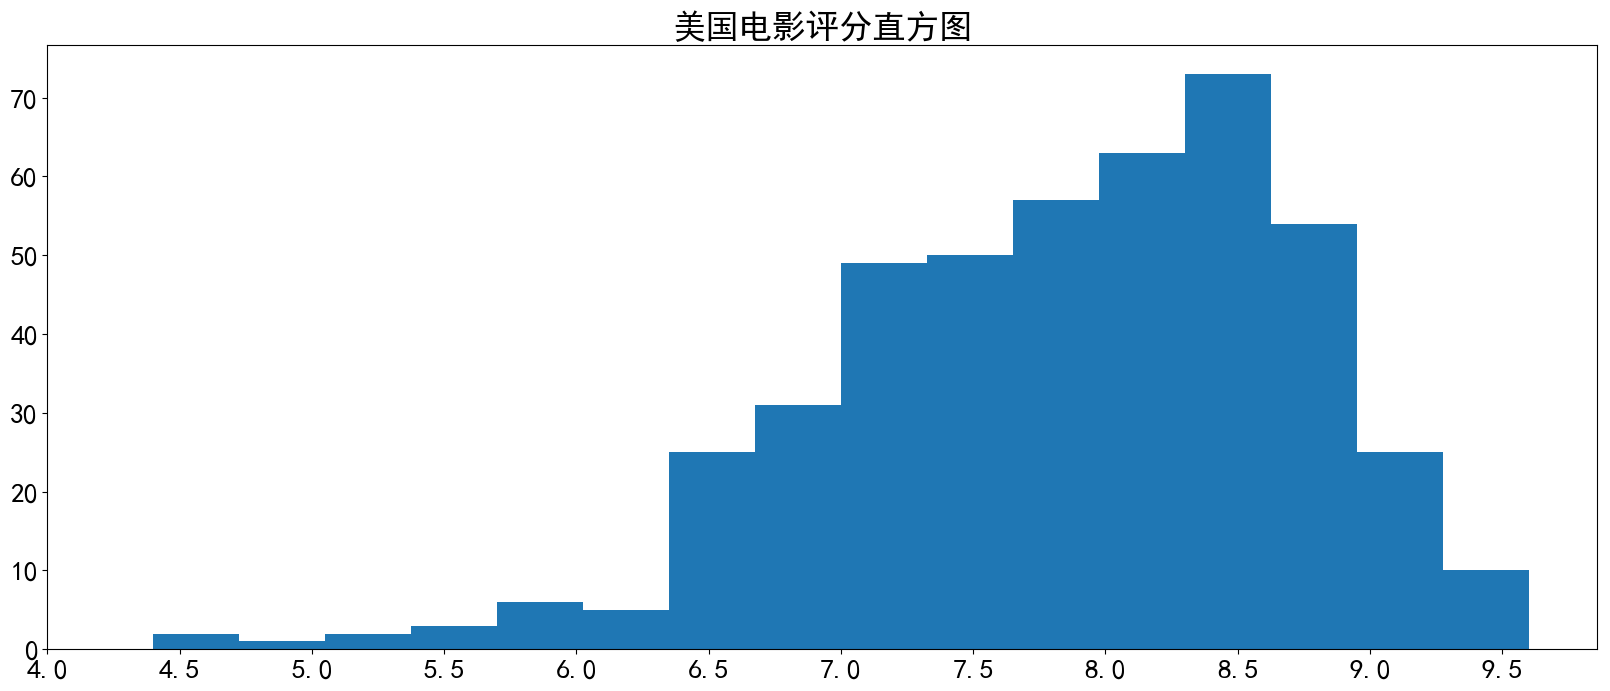

In [64]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size']=20
#组距
d = 0.5
#组数
num_bins=(10-2)/0.5
plt.figure(figsize=(20,8),dpi=100)
plt.hist(list(usa_rate),bins=16)
plt.xticks(list(np.arange(4,10,0.5)))
plt.title('美国电影评分直方图')
plt.show()

In [54]:
#中国大陆
ch_rate = df['rate'][df['country']=='中国大陆']
ch_rate.count()

276

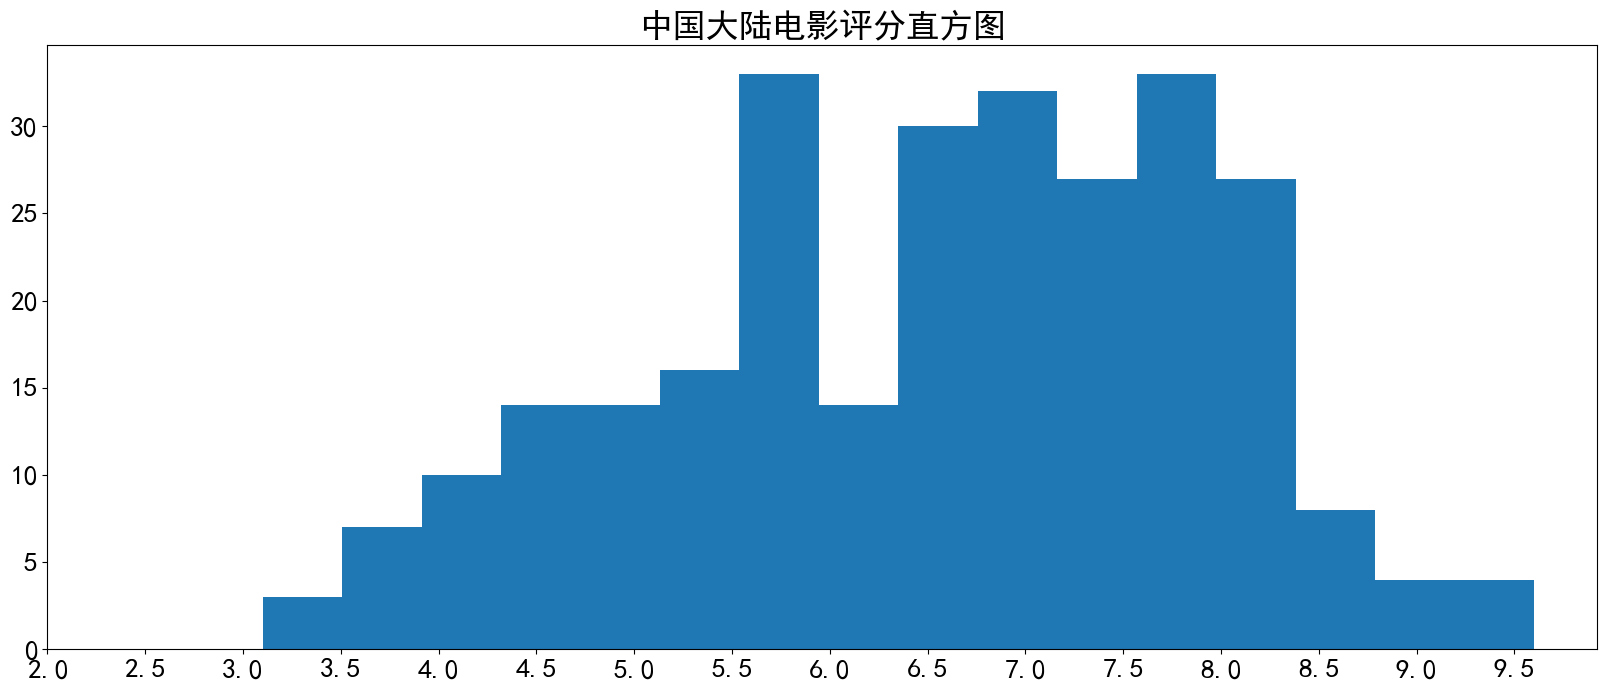

In [60]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size']=20
#组距
d = 0.5
#组数
num_bins=(10-2)/0.5
plt.figure(figsize=(20,8),dpi=100)
plt.hist(list(ch_rate),bins=16)
plt.xticks(list(np.arange(2,10,0.5)))
plt.title('中国大陆电影评分直方图')
plt.show()

In [57]:
#日本
jp_rate = df['rate'][df['country']=='日本']
jp_rate.count()

85

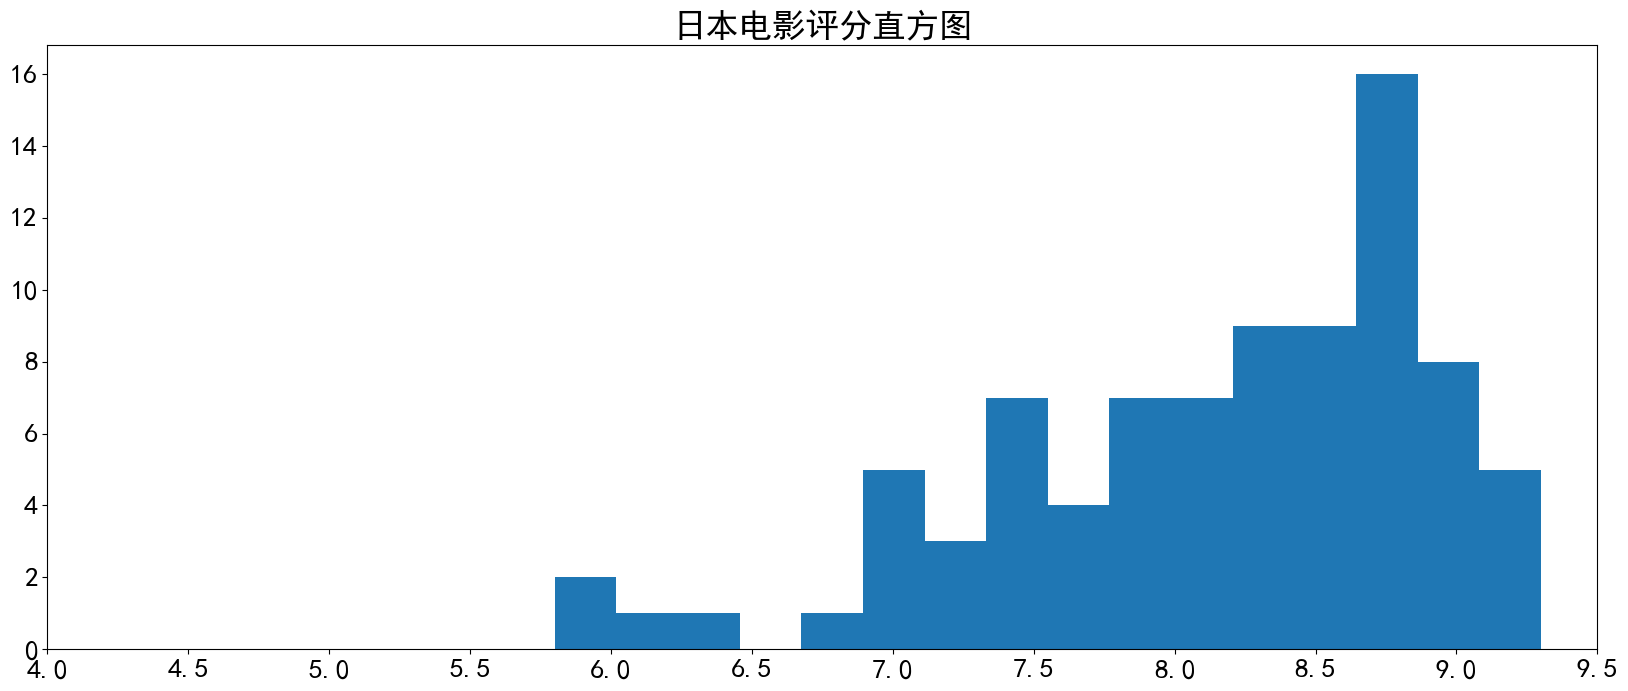

In [61]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size']=20
#组距
d = 0.5
#组数
num_bins=(10-2)/0.5
plt.figure(figsize=(20,8),dpi=100)
plt.hist(list(jp_rate),bins=16)
plt.xticks(list(np.arange(4,10,0.5)))
plt.title('日本电影评分直方图')
plt.show()

In [68]:
def switch_contens(x):
    x=int(x)
    return int(x)
df['contents'] = df['contents'].apply(switch_contens)

### 评论大于50万，评分大于8.5分的电影


In [87]:
df[(df['contents']>500000)&(df['rate']>=8.5)][['title','rate']].sort_values(by='rate',ascending=False)

,title,rate
54,霸王别姬,9.6
30,肖申克的救赎,9.6
83,辛德勒的名单,9.5
61,美丽人生,9.5
31,阿甘正传,9.4
32,这个杀手不太冷,9.4
75,忠犬八公的故事,9.3
25,泰坦尼克号,9.3
124,教父,9.3
29,千与千寻,9.3
